# MNIST image recognition

In [69]:
# Import the modules
import numpy as np
import cv2
#import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Aislamiento de trazos

(1132, 3250, 3)


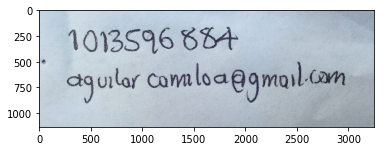

In [70]:
im = cv2.imread("./images/prueba7.jpg")
print(im.shape)
plt.imshow(im, cmap='gray')
#plt.show()


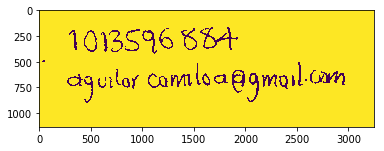

In [72]:
# simple_thresholding
blurred = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(blurred, (5, 5), 0)
(T, thresh) = cv2.threshold(blurred, 120, 220, cv2.THRESH_BINARY)
plt.imshow(thresh)

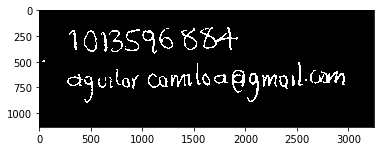

In [73]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)
#plt.imshow(im_gray)
im_gray = thresh
plt.imshow(thresh, cmap='Greys')

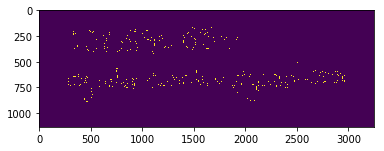

In [74]:
# Blurred
edged = cv2.Canny(im_gray, 100, 100)
plt.imshow(edged)

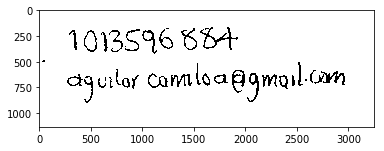

In [75]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(im_th, cmap='Greys')

In [76]:
# Find contours in the image
_, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [77]:
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
print(rects)

[(2020, 828, 3, 5), (2017, 797, 4, 7), (2583, 668, 22, 20), (572, 658, 82, 95), (639, 649, 17, 49), (683, 645, 32, 111), (435, 638, 91, 262), (2331, 631, 85, 130), (901, 628, 74, 133), (2450, 625, 33, 116), (2166, 623, 146, 120), (2670, 622, 94, 90), (1276, 621, 155, 127), (272, 621, 152, 118), (1430, 620, 53, 114), (1697, 616, 137, 97), (1586, 614, 77, 117), (1053, 613, 196, 140), (2021, 607, 111, 287), (2728, 590, 242, 139), (2625, 579, 58, 133), (1868, 577, 132, 223), (744, 564, 146, 186), (1526, 517, 44, 211), (2508, 501, 57, 237), (31, 482, 28, 25), (675, 213, 21, 25), (599, 211, 66, 198), (433, 197, 132, 208), (1004, 194, 144, 229), (697, 192, 118, 215), (290, 191, 85, 195), (829, 185, 154, 214), (1167, 180, 136, 196), (1235, 172, 31, 14), (1379, 170, 158, 216), (1561, 164, 370, 221)]


In [78]:
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    #roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)


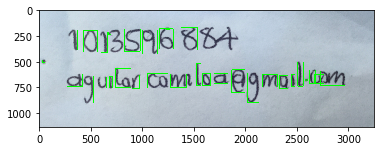

In [79]:
plt.imshow(im)

In [80]:
## Guarda resultados
cv2.imwrite('./results/res_p7.png',im)

True

## Predicciones

...